In [39]:
import ast
with open('1000_most_common_kmers.py', 'r') as f:
    most_common = ast.literal_eval(f.read())

In [40]:
# Convert into list of kmers separated by space
temp = []
for kmc in most_common:
    temp.append(kmc[0])
kms_str = str(temp).replace(',', "").replace("'", '')[1:-1]

In [68]:
import subprocess
files = ["02H043", "03H090", "04H120", "05H072"] # a few random patient IDs
profiles = []
for f in files:
    jf = f"/u/leucegene/data/rnaseq/jellyfish/EXT001/{f}/2.2.3/kmers.k31.CL2.jf"
    # Query for specific kmer counts from each file
    cmd = f"jellyfish query {jf} {kms_str}"
    output = subprocess.check_output(cmd, shell=True).decode("utf-8")
    # Convert to object
    profile = {}
    for line in output.splitlines():
        km, cnt = line.split()
        profile[km] = int(cnt)
    profiles.append(profile)
    print(f"Queried {f}...")
print("Done with the queries!")

Queried 02H043...
Queried 03H090...
Queried 04H120...
Queried 05H072...
Done with the queries!


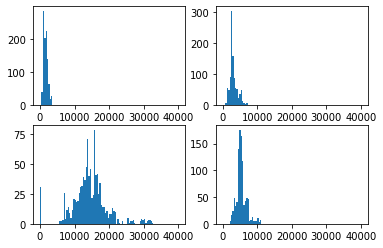

In [102]:
# Make distribution graph of kmer frequencies
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
i = 0
axes = [ax1, ax2, ax3, ax4]
for profile in profiles:
    axes[i].hist(list(profile.values()), bins=100, range=(0, 40000))
    i += 1
plt.show()

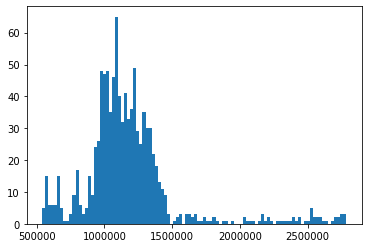

In [104]:
# Visually compare with distribution of test patient
test = [kmc[1] for kmc in most_common]
plt.hist(test, bins=100)
plt.show()